## Question 1
Question 1.1 - Plot a heatmap of the Pearson correlation matrix of the dataset columns. Report which features have the highest absolute correlation with the target variable. In the context of either dataset, describe what the correlation patterns suggest.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# This block accesses your google drive
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# df_diamonds = pd.read_csv("/content/drive/MyDrive/diamonds_ece219.csv").drop(columns = "Unnamed: 0")
df_diamonds = pd.read_csv("diamonds_ece219.csv")
df_diamonds.head()

,Unnamed: 0,color,clarity,carat,cut,symmetry,polish,depth_percent,table_percent,length,width,depth,girdle_min,girdle_max,price
0,0,E,VVS2,0.09,Excellent,Very Good,Very Good,62.7,59.0,2.85,2.87,1.79,M,M,200
1,1,E,VVS2,0.09,Very Good,Very Good,Very Good,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,2,E,VVS2,0.09,Excellent,Very Good,Very Good,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,3,E,VVS2,0.09,Excellent,Very Good,Very Good,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,4,E,VVS2,0.09,Very Good,Very Good,Excellent,64.9,58.5,2.79,2.83,1.82,STK,STK,200


In [ ]:
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149871 entries, 0 to 149870
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   color          149871 non-null  object 
 1   clarity        149871 non-null  object 
 2   carat          149871 non-null  float64
 3   cut            149871 non-null  object 
 4   symmetry       149871 non-null  object 
 5   polish         149871 non-null  object 
 6   depth_percent  149871 non-null  float64
 7   table_percent  149871 non-null  float64
 8   length         149871 non-null  float64
 9   width          149871 non-null  float64
 10  depth          149871 non-null  float64
 11  girdle_min     149871 non-null  object 
 12  girdle_max     149871 non-null  object 
 13  price          149871 non-null  int64  
dtypes: float64(6), int64(1), object(7)
memory usage: 16.0+ MB


In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_diamonds, test_size = 0.2)

train_features = train_set.drop(columns = "price")
train_labels = pd.DataFrame(train_set["price"])

test_features = test_set.drop(columns = "price")
test_labels = pd.DataFrame(test_set["price"])

print(train_features.info(), '\n',
      train_labels.info(), '\n',
      test_features.info(), '\n',
      test_labels.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119896 entries, 96505 to 43387
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   color          119896 non-null  object 
 1   clarity        119896 non-null  object 
 2   carat          119896 non-null  float64
 3   cut            119896 non-null  object 
 4   symmetry       119896 non-null  object 
 5   polish         119896 non-null  object 
 6   depth_percent  119896 non-null  float64
 7   table_percent  119896 non-null  float64
 8   length         119896 non-null  float64
 9   width          119896 non-null  float64
 10  depth          119896 non-null  float64
 11  girdle_min     119896 non-null  object 
 12  girdle_max     119896 non-null  object 
dtypes: float64(6), object(7)
memory usage: 12.8+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 119896 entries, 96505 to 43387
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ----

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

diamond_attributes = ["color", "clarity", "carat", "cut", "symmetry", "polish", "depth_percent", "table_percent", "length", "width", "depth", "girdle_min", "girdle_max"]

attr_dict = {
             "color": ['D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M'],
             "clarity": ['I1', 'I2', 'I3', 'SI1', 'SI2', 'VS1','VS2', 'VVS1','VVS2', 'IF'],
             "cut": ['Very Good', 'Excellent'],
             "symmetry": ['Very Good', 'Excellent'],
             "polish": ['Very Good', 'Excellent'],
             "girdle_min": ['M', 'STK', 'TN', 'TK', 'VTN', 'XTN', 'STN', 'VTK', 'XTK', 'unknown'],
             "girdle_max": ['M', 'STK', 'TN', 'TK', 'VTN', 'XTN', 'STN', 'VTK', 'XTK', 'unknown']
             }


full_pipeline_cat = ColumnTransformer(
    transformers = [
    ("color_column", OrdinalEncoder(categories=[attr_dict["color"]]),["color"]),
    ("clarity_column", OrdinalEncoder(categories=[attr_dict["clarity"]]),["clarity"]),
    ("cut_column", OrdinalEncoder(categories=[attr_dict["cut"]]),["cut"]),
    ("symmetry_column", OrdinalEncoder(categories=[attr_dict["symmetry"]]),["symmetry"]),
    ("polish_column", OrdinalEncoder(categories=[attr_dict["polish"]]),["polish"]),
    ("girdle_min_column", OrdinalEncoder(categories=[attr_dict["girdle_min"]]),["girdle_min"]),
    ("girdle_max_column", OrdinalEncoder(categories=[attr_dict["girdle_max"]]),["girdle_max"])
    ],
    remainder = "passthrough"
)

train_features_cat = full_pipeline_cat.fit_transform(train_features)
test_features_cat = full_pipeline_cat.transform(test_features)

if(full_pipeline_cat.sparse_output_):
    train_features_cat = train_features_cat.toarray()
    test_features_cat = test_features_cat.toarray()

# Constructing the dataframe
df_train_features_cat = pd.DataFrame(train_features_cat, columns=diamond_attributes)
df_test_features_cat = pd.DataFrame(test_features_cat, columns=diamond_attributes)

df_train_features_cat.head()

,color,clarity,carat,cut,symmetry,polish,depth_percent,table_percent,length,width,depth,girdle_min,girdle_max
0,2.0,3.0,1.0,1.0,1.0,0.0,1.0,0.51,62.2,57.0,5.10,5.14,3.19
1,4.0,6.0,0.0,0.0,1.0,9.0,9.0,1.51,62.2,58.0,7.28,7.32,4.54
2,2.0,9.0,0.0,1.0,1.0,0.0,1.0,0.31,62.2,59.0,4.34,4.36,2.71
3,2.0,3.0,1.0,1.0,1.0,0.0,1.0,0.32,62.4,58.0,4.34,4.37,2.72
4,4.0,8.0,0.0,0.0,1.0,0.0,3.0,0.50,62.6,63.0,4.99,5.06,3.15


In [ ]:
# Training for float64 values only
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_attributes = ["carat", "depth_percent", "table_percent", "length", "width", "depth"]
cat_attributes= ["color", "clarity", "cut", "symmetry", "polish", "girdle_min", "girdle_max"]
all_attributes =  cat_attributes + num_attributes

num_pipeline_scaler = Pipeline([
    ('std_scaler',StandardScaler()),
])


full_pipeline_scaler = ColumnTransformer(
    transformers = [
    ("num", num_pipeline_scaler, all_attributes),
    ],
    remainder = "passthrough"
)

train_features_ss = full_pipeline_scaler.fit_transform(df_train_features_cat)
test_features_ss = full_pipeline_scaler.transform(df_test_features_cat)

if(full_pipeline_scaler.sparse_output_):
    train_features_ss = train_features_ss.toarray()
    test_features_ss = test_features_ss.toarray()

df_train_features_ss = pd.DataFrame(train_features_ss, columns = all_attributes)
df_test_features_ss  = pd.DataFrame(test_features_ss, columns = all_attributes)

df_train_features_ss.head()

,color,clarity,cut,symmetry,polish,girdle_min,girdle_max,carat,depth_percent,table_percent,length,width,depth
0,-0.491694,-1.158385,0.572072,0.395762,-0.850423,0.082183,0.003969,0.517211,-0.767406,-0.109022,0.090068,-0.164909,0.081199
1,0.357162,0.296485,-1.748030,0.395762,1.345001,2.141765,0.703094,-1.933449,1.329754,2.385512,0.090068,0.091358,2.239537
2,-0.491694,1.751354,0.572072,0.395762,-0.850423,-0.654731,-0.244609,-1.933449,-0.767406,-0.607929,0.090068,0.347625,-0.671249
3,-0.491694,-1.158385,0.572072,0.395762,-0.850423,-0.645284,-0.239430,0.517211,-0.767406,-0.582984,0.141042,0.091358,-0.671249
4,0.357162,1.266398,-1.748030,0.395762,-0.850423,0.006602,-0.016746,-1.933449,-0.243116,-0.133968,0.192015,1.372691,-0.027708


In [ ]:
label_process_ss = StandardScaler()
train_labels_ss = label_process_ss.fit_transform(train_labels)
test_labels_ss = label_process_ss.transform(test_labels)

df_train_labels_ss = pd.DataFrame(train_labels_ss, columns = ["price"])
df_test_labels_ss  = pd.DataFrame(test_labels_ss, columns = ["price"])

df_train_labels_ss.head()

,price
0,-0.201196
1,2.480651
2,-0.460414
3,-0.502909
4,-0.145953


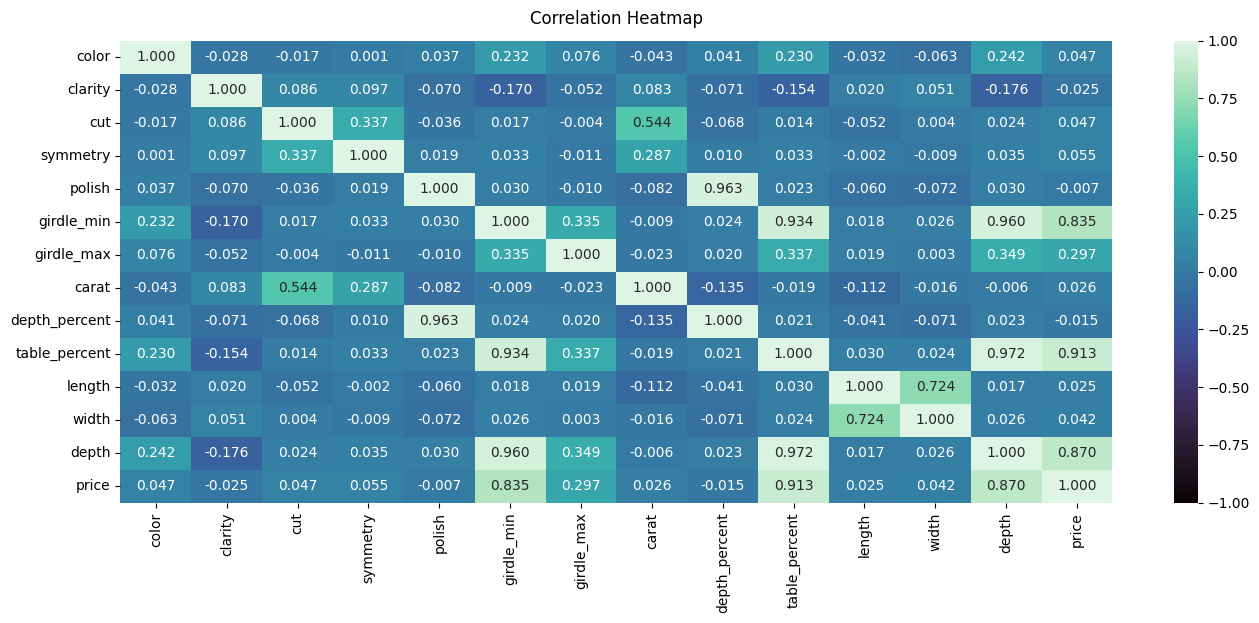

In [ ]:
train_set_ss = pd.concat([df_train_features_ss, df_train_labels_ss],axis = 1)
corr_matrix = train_set_ss.corr(method = 'pearson')
plt.figure(figsize = (16,6))
h_map = sns.heatmap(corr_matrix, vmin=-1, vmax=1, cbar = True, fmt = '.3f', annot = True, cmap ='mako')
h_map.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

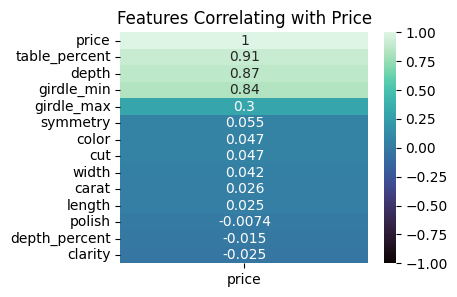

In [ ]:
plt.figure(figsize = (4,3))
h_map = sns.heatmap(train_set_ss.corr()[["price"]].sort_values(by = "price",ascending=False),vmin=-1, vmax=1, annot=True,cmap ='mako')
h_map.set_title("Features Correlating with Price")
plt.show()

QUESTION 1.2 Plot the histogram of numerical features. What preprocessing can be done if the distribution of a feature has high skewness?

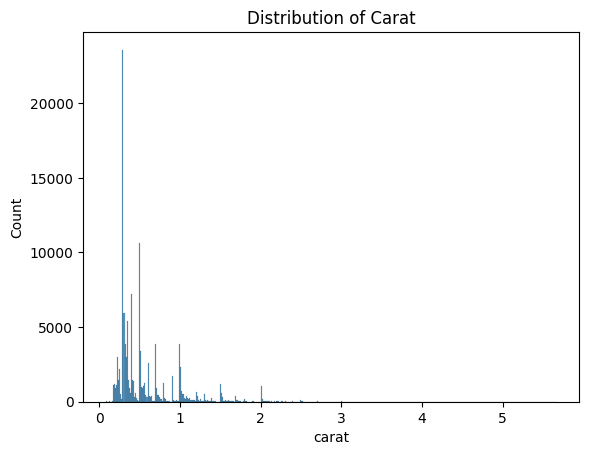

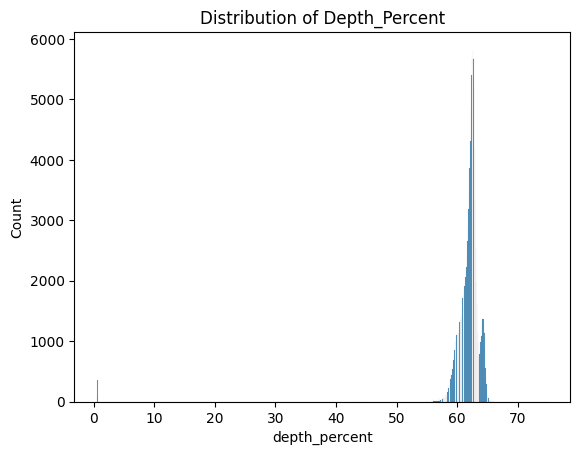

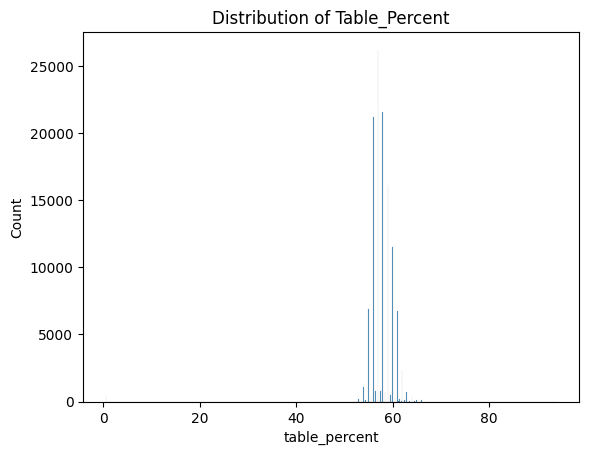

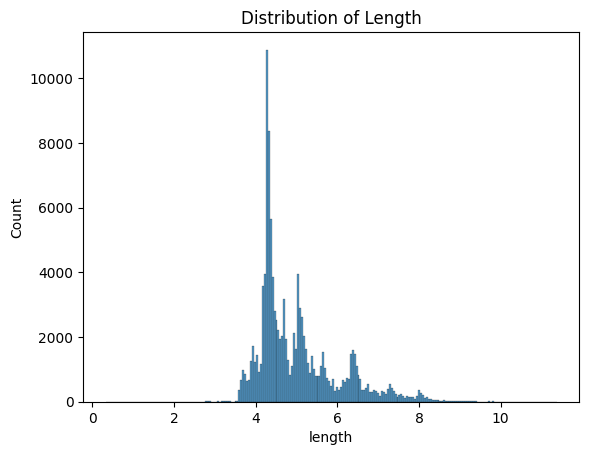

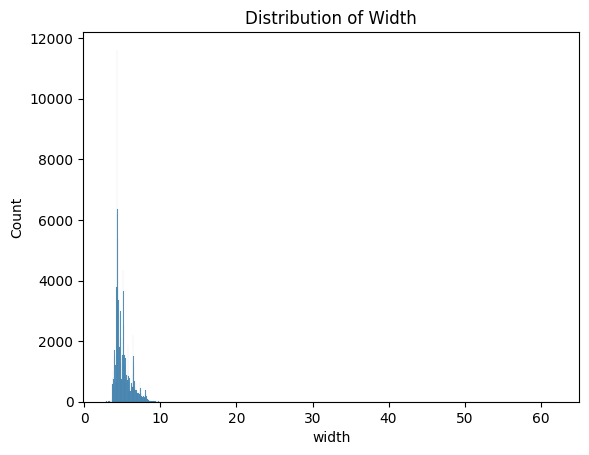

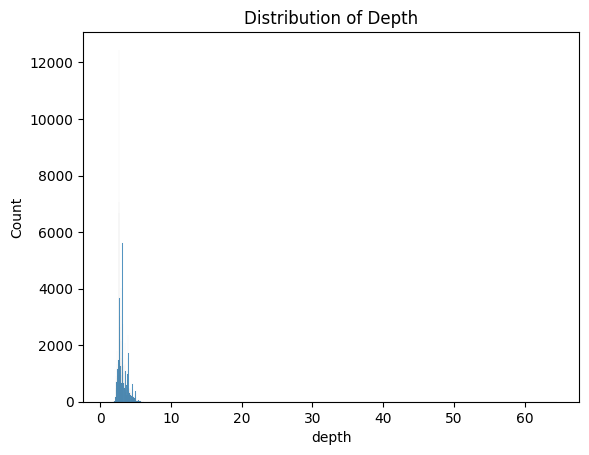

In [ ]:
# Initial iteration
def diamond_histogram(attributes, data):
  for attribute in attributes:
    plt.figure()
    sns.histplot(x = attribute, data=data)
    plt.title("Distribution of {}".format(attribute.title()))

diamond_histogram(num_attributes, train_features)

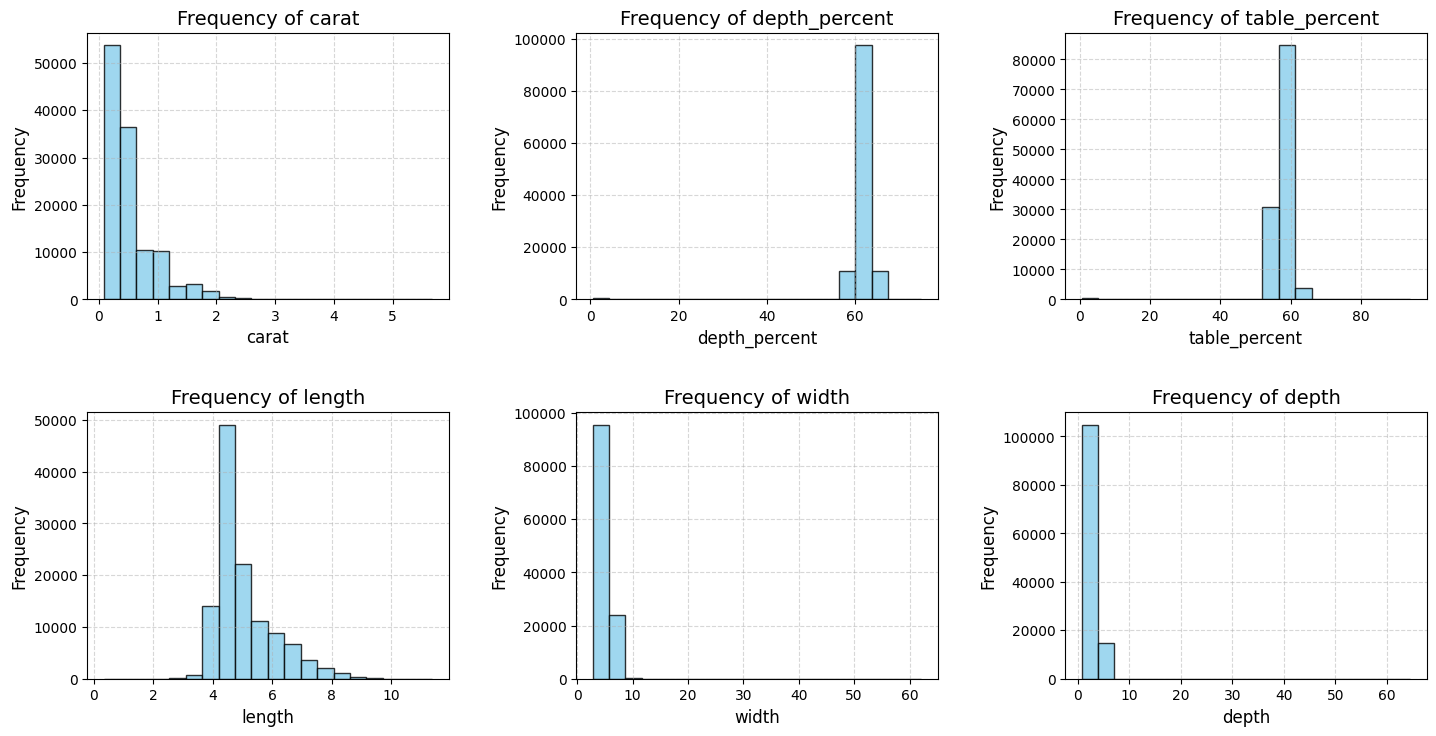

In [ ]:
# The same as the above cell but with restricted bins for improved legibility

import math

def plot_histogram(dataset, features):
    num_features = len(features)

    # Calculate the number of rows and columns for subplots
    num_cols = 3  # You can choose another number if you prefer
    num_rows = math.ceil(num_features / num_cols)

    # Create a figure and a set of subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))

    # Flatten the axes array and hide any unused if necessary
    axs = axs.flatten()
    for ax in axs[num_features:]:
        ax.remove()

    # Iterate through the number of features and plot
    for index, feature in enumerate(features):
        axs[index].hist(dataset[feature], bins=20, edgecolor='k', linewidth=1, alpha=0.8, color='skyblue')
        axs[index].set_title(f"Frequency of {feature}", fontsize=14)
        axs[index].set_xlabel(feature, fontsize=12)
        axs[index].set_ylabel("Frequency", fontsize=12)
        axs[index].grid(True, linestyle='--', alpha=0.5)

    fig.tight_layout(pad=3.0)
    plt.show()

plot_histogram(train_features, num_attributes)

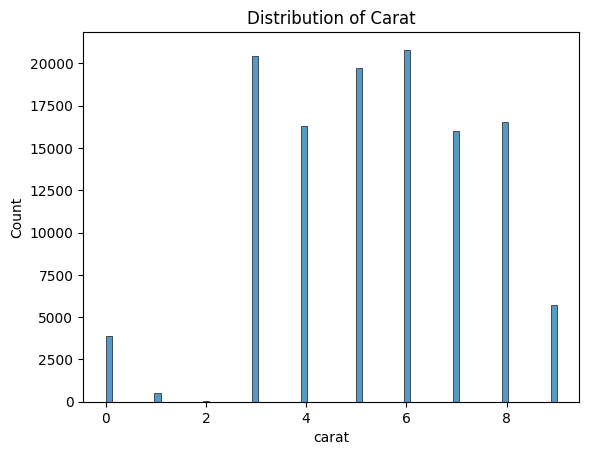

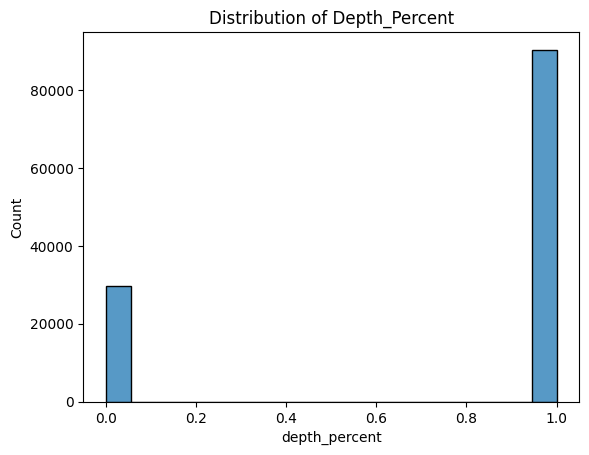

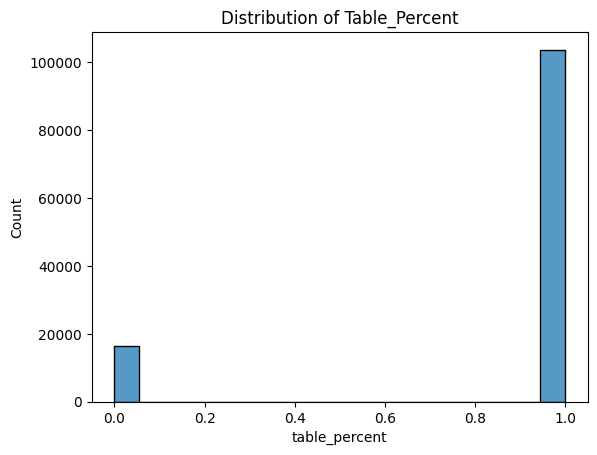

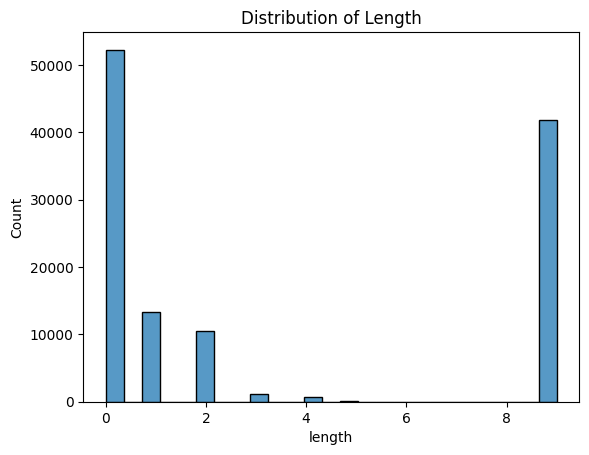

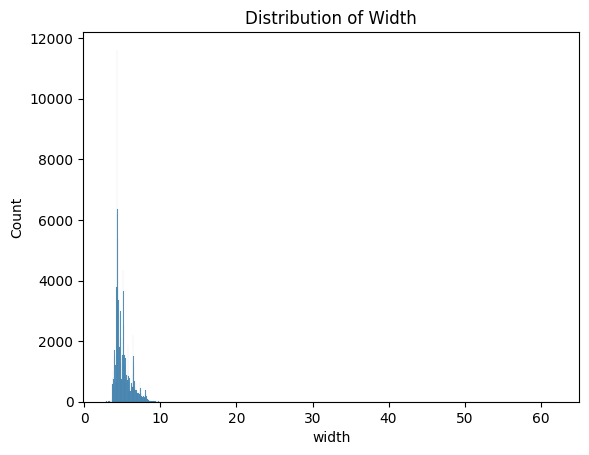

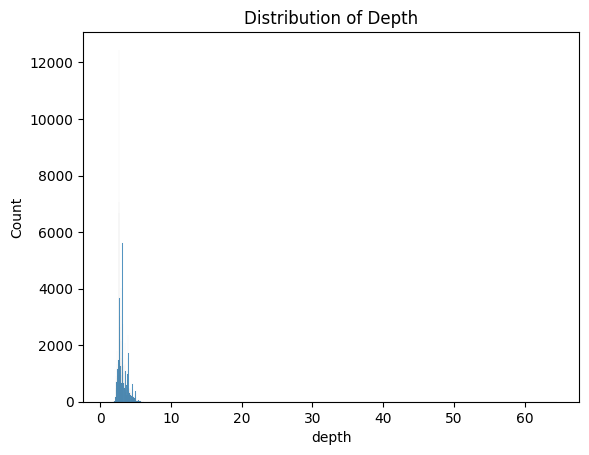

In [ ]:
#sklearn.preprocessing.PowerTransformer
from sklearn.preprocessing import PowerTransformer
num_attributes = ["carat", "depth_percent", "table_percent", "length", "width", "depth"]
num_pipeline_p = Pipeline([
    ('std_scaler',PowerTransformer()),
])

full_pipeline_p = ColumnTransformer(
    transformers = [
    ("num", num_pipeline_p, num_attributes),
    ],
    remainder = "passthrough"
)


train_features_p = full_pipeline_p.fit_transform(df_train_features_cat)
test_features_p = full_pipeline_p.transform(df_test_features_cat)


if(full_pipeline_p.sparse_output_):
    train_features_p = train_features_p.toarray()
    test_features_p = test_features_p.toarray()

df_train_features_p = pd.DataFrame(train_features_p, columns = all_attributes)
df_test_features_p  = pd.DataFrame(test_features_p, columns = all_attributes)

# df_train_features_p.head()
# Plot new histograms
diamond_histogram(num_attributes, df_train_features_p)

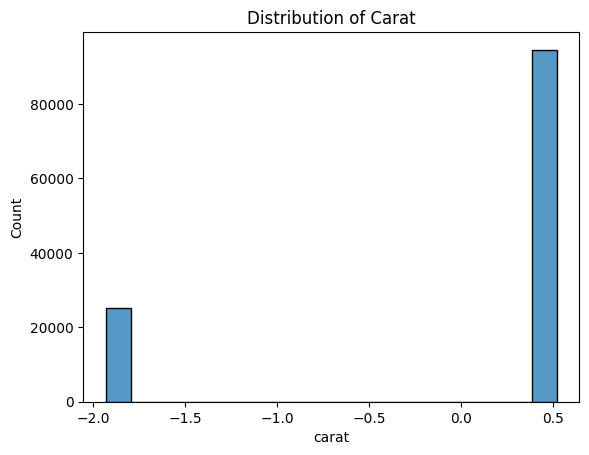

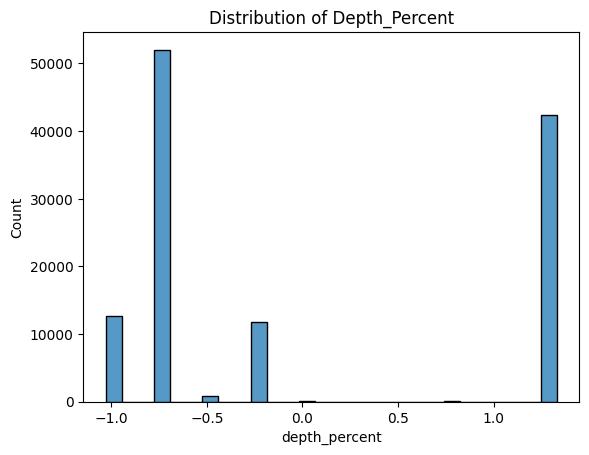

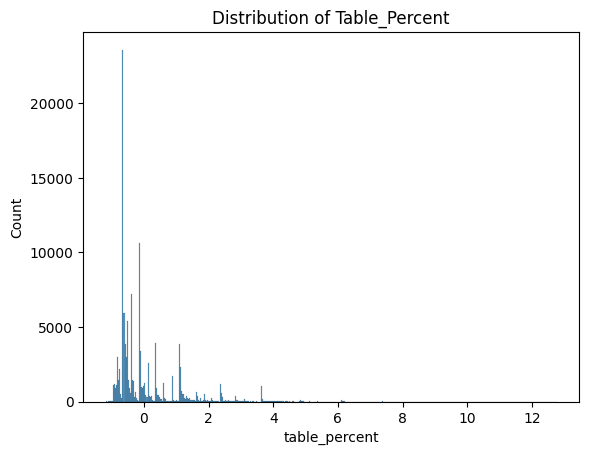

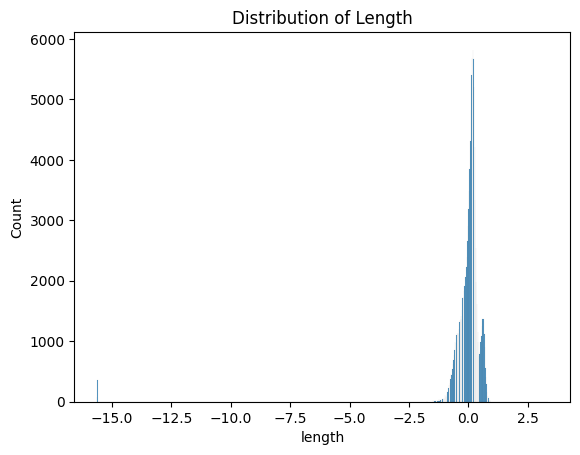

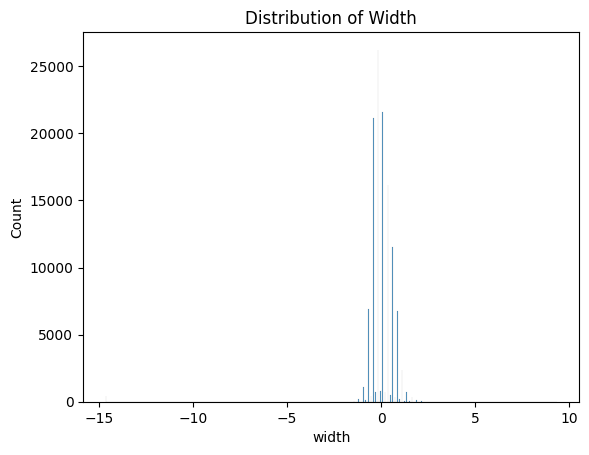

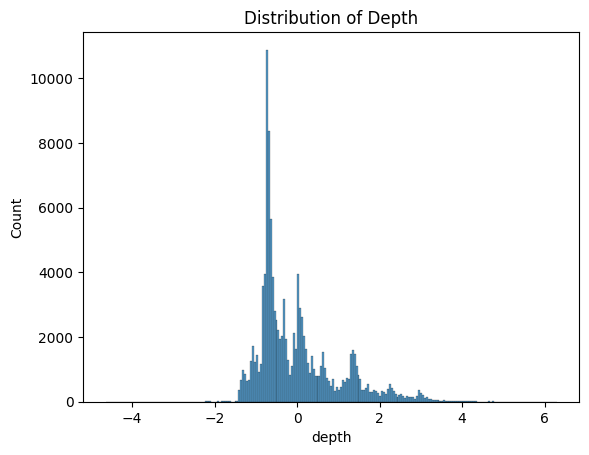

In [ ]:
diamond_histogram(num_attributes, df_train_features_ss)

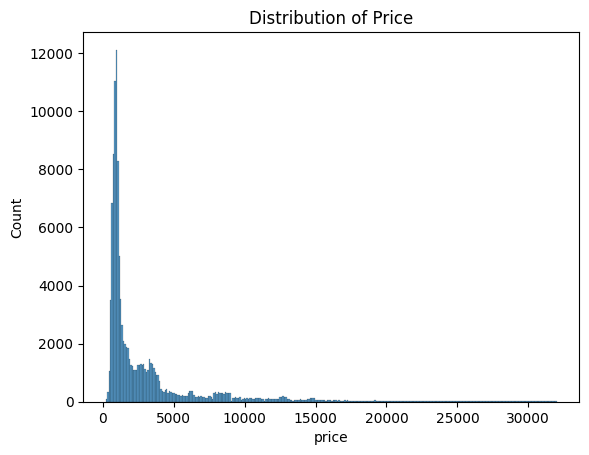

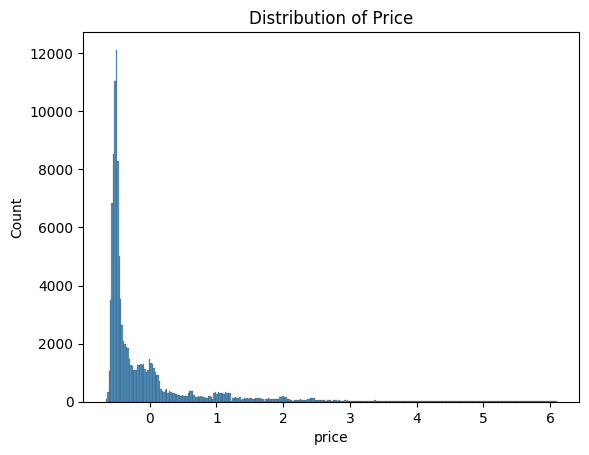

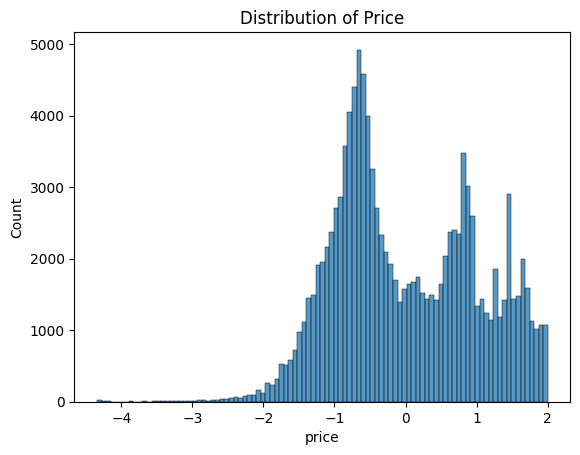

In [ ]:
label_process = PowerTransformer(method = 'box-cox')
train_labels_p = label_process.fit_transform(train_labels)
test_labels_p = label_process.transform(test_labels)

df_train_labels_p = pd.DataFrame(train_labels_p , columns = ["price"])
df_test_labels_p = pd.DataFrame(test_labels_p , columns = ["price"])

for data in [pd.DataFrame(train_labels), df_train_labels_ss, df_train_labels_p]:
  diamond_histogram(["price"], data)

QUESTION 1.3 Construct and inspect the box plot of categorical features vs target variable. What do you find?

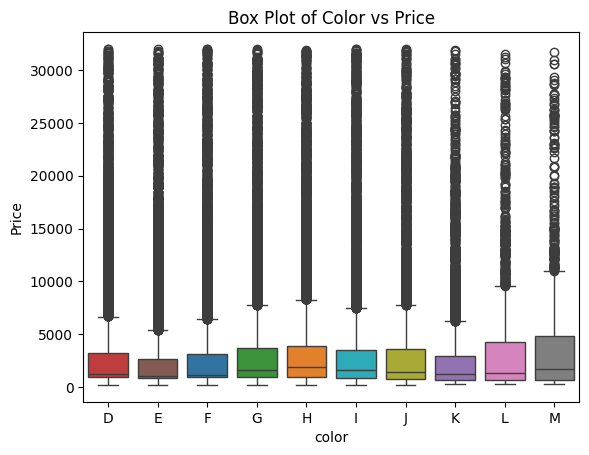

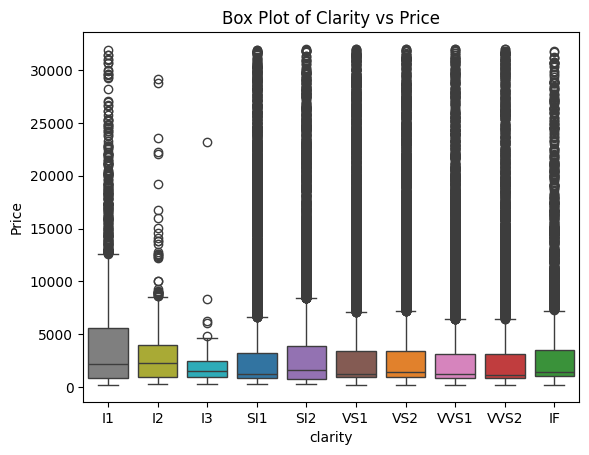

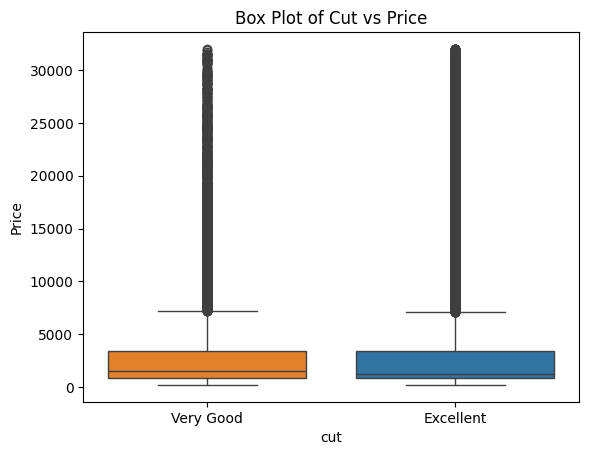

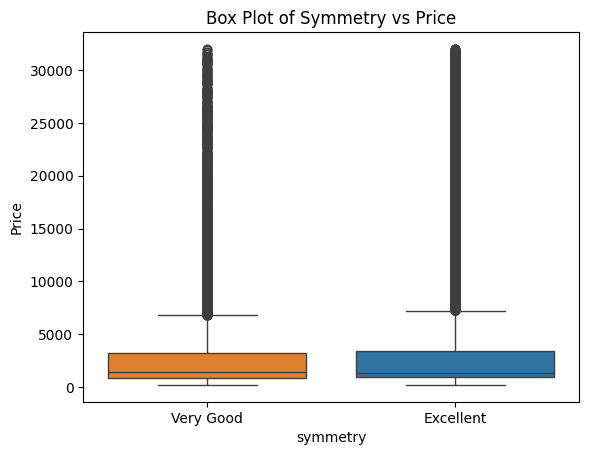

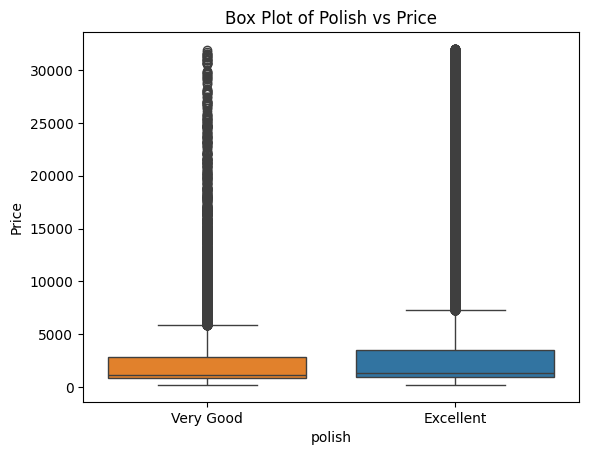

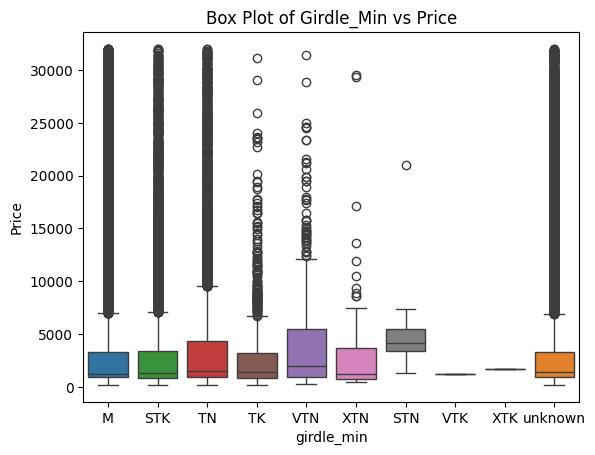

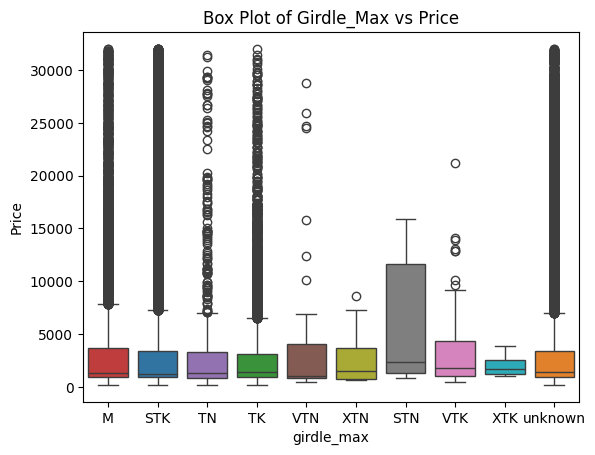

<Figure size 640x480 with 0 Axes>

In [ ]:
def diamond_boxplot(attribute, order):
  sns.boxplot(x=train_set[attribute],y=train_set["price"], hue = train_set[attribute], legend=False, order=order)
  plt.title("Box Plot of {} vs Price".format(attribute.title()))
  plt.ylabel("Price")
  plt.figure()

for attribute in attr_dict:
  diamond_boxplot(attribute, attr_dict[attribute])

QUESTION 1.4 For the Diamonds dataset, plot the counts by color, cut and clarity.

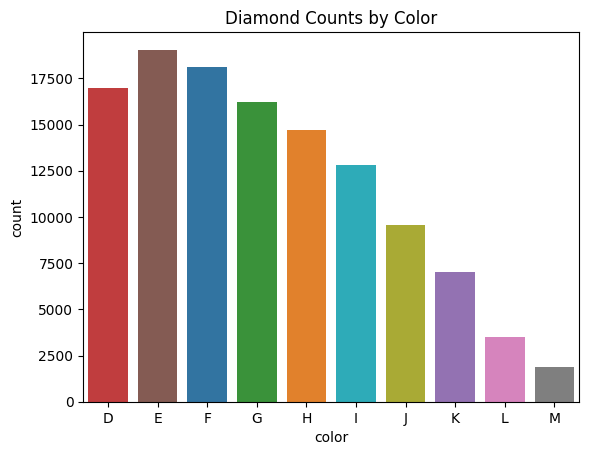

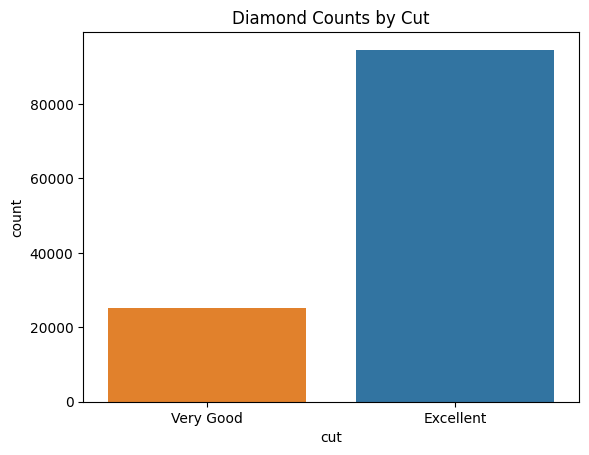

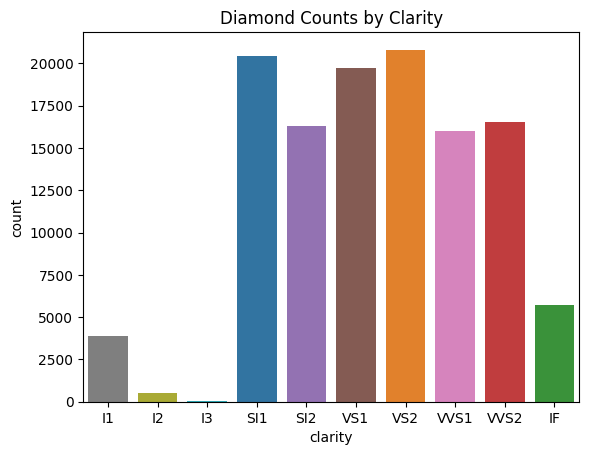

In [ ]:
def diamond_count_plot(attribute, order):
  plt.figure()
  sns.countplot(x=train_set[attribute], hue=train_set[attribute], legend=False, order=order)
  plt.title("Diamond Counts by {}".format(attribute.title()))

for attribute in ["color", "cut", "clarity"]:
  diamond_count_plot(attribute, attr_dict[attribute])

##Question 2
QUESTION 2.1 Standardize feature columns and prepare them for training.

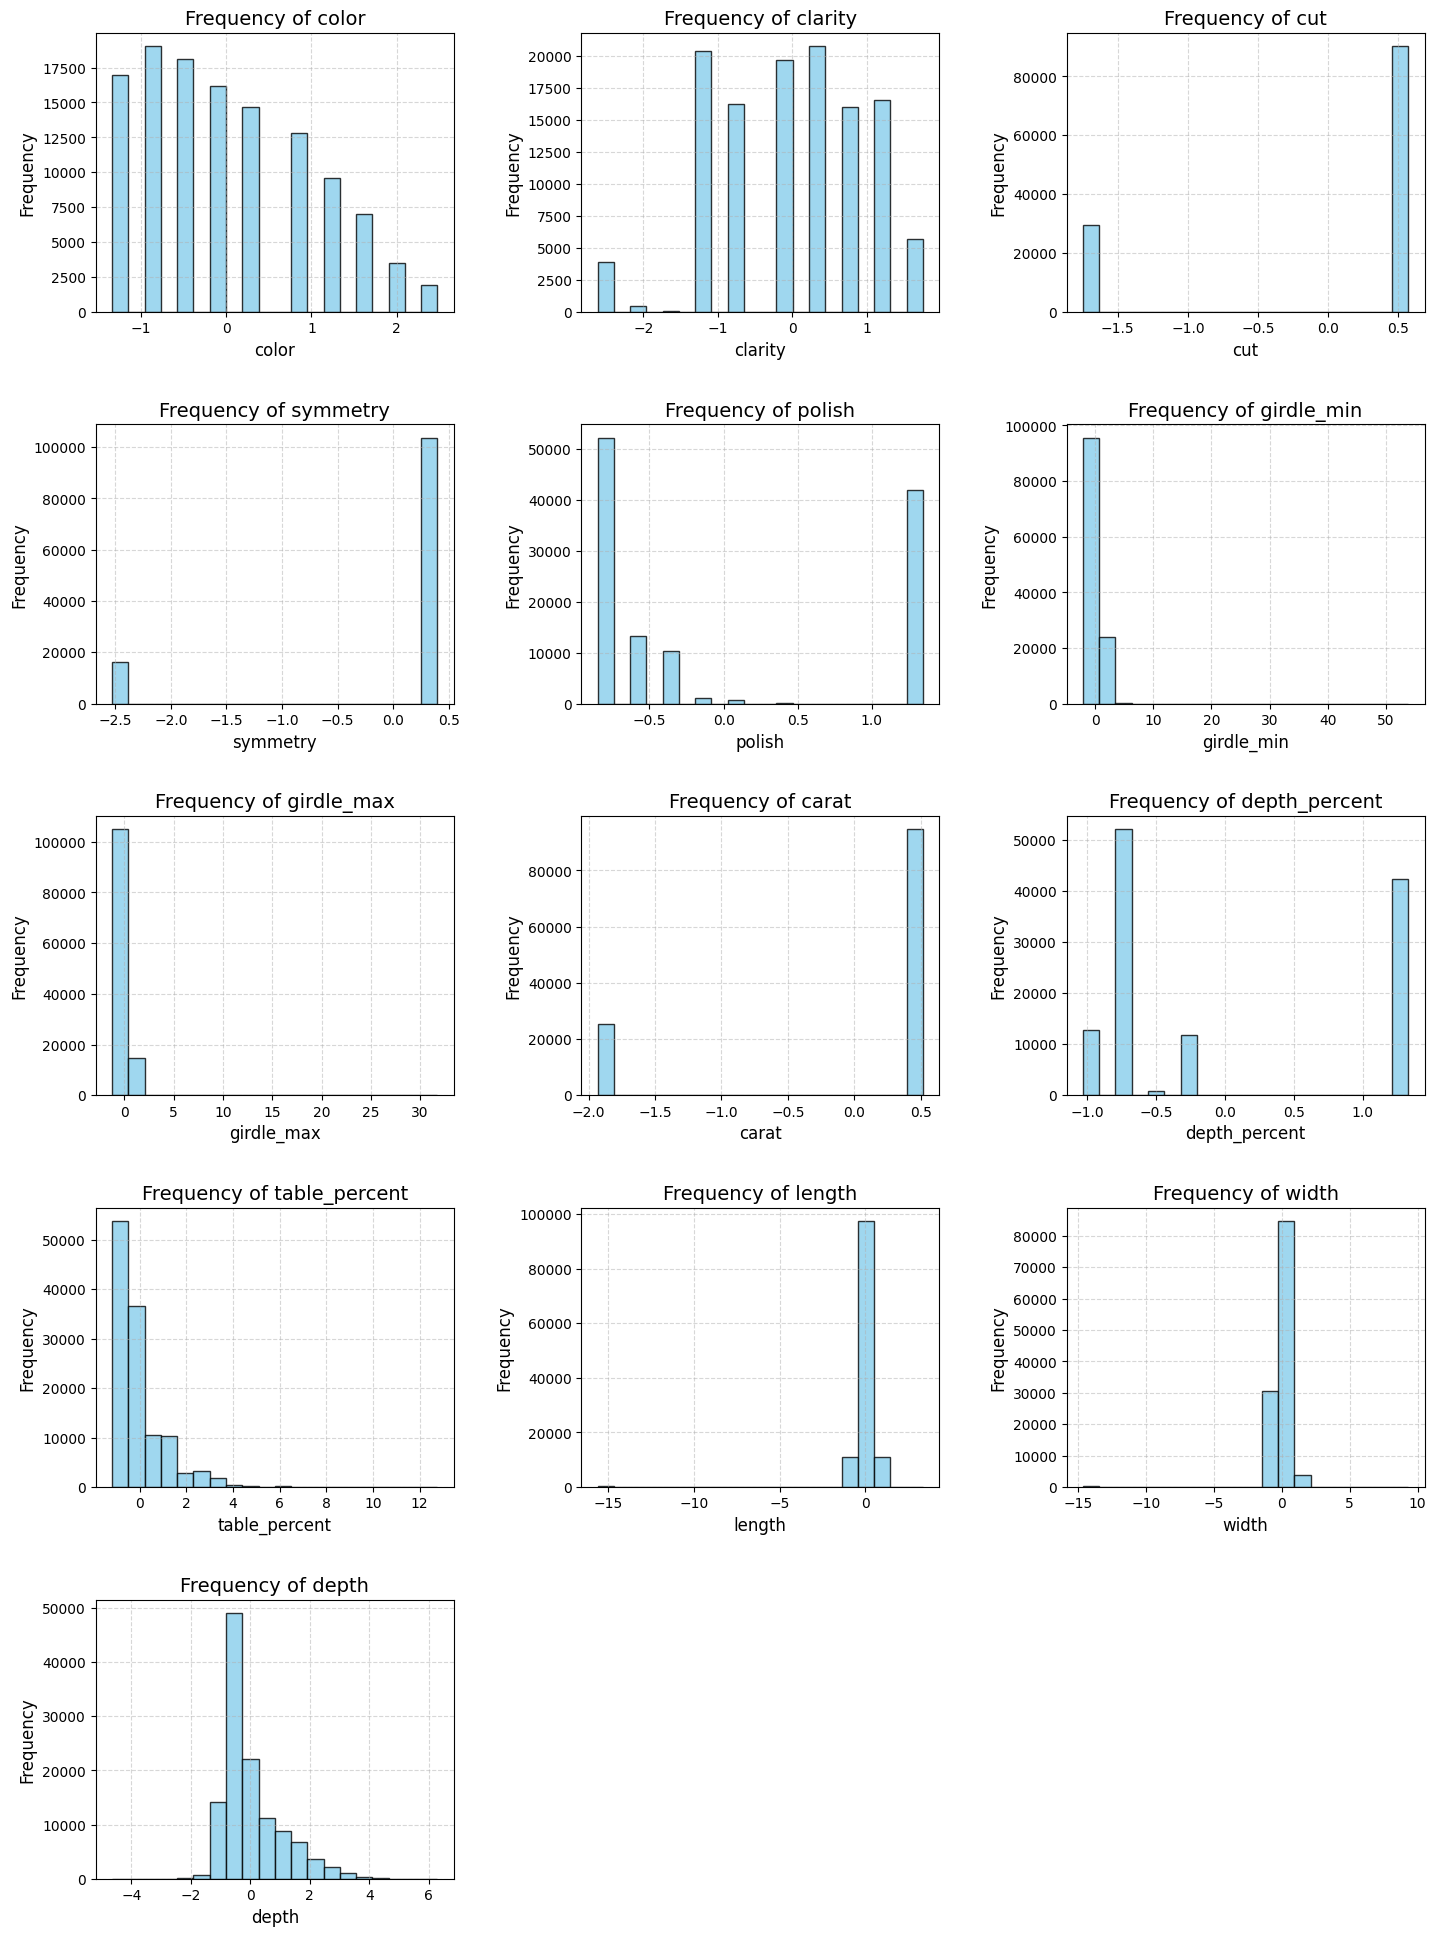

In [ ]:
# Same as before but with less bins for clarity
plot_histogram(df_train_features_ss, all_attributes)

In [ ]:
# Standardization for diamonds encoding

encoding_dict = {
             "color": {'D': 1, 'E': 2, 'F': 3, 'G': 4, 'H': 5, 'I': 6, 'J': 7, 'K': 8, 'L': 9, 'M': 10},
             "clarity": {'I1': 1, 'I2': 2, 'I3': 3, 'SI1': 4, 'SI2': 5, 'VS1': 6,'VS2': 7, 'VVS1': 8,'VVS2': 9, 'IF': 10},
             "cut": {'Very Good' : 1, 'Excellent' : 2},
             "symmetry": {'Very Good' : 1, 'Excellent' : 2},
             "polish": {'Very Good' : 1, 'Excellent' : 2},
             "girdle_min": {'M': 1, 'STK': 2, 'TN': 3, 'TK': 4, 'VTN': 5, 'XTN': 6, 'STN': 7, 'VTK': 8, 'XTK': 9, 'unknown': 10},
             "girdle_max": {'M': 1, 'STK': 2, 'TN': 3, 'TK': 4, 'VTN': 5, 'XTN': 6, 'STN': 7, 'VTK': 8, 'XTK': 9, 'unknown': 10}
             }

# We do not want to overwrite the original df_diamonds dataset so we use placeholder variable
encode_diamonds = df_diamonds.copy()

for feature in encoding_dict:
  encoded_feats = [encoding_dict[feature][f] for f in encode_diamonds[feature]]
  encode_diamonds[feature] = encoded_feats

In [ ]:
from sklearn import preprocessing

# Ensure all columns to be scaled are numeric, then scale only numeric columns
numeric_cols = encode_diamonds.select_dtypes(include=[np.number]).columns
diamonds_scaled_values = preprocessing.scale(encode_diamonds[numeric_cols])

# Create a new DataFrame with scaled values for numeric columns
diamond_standard = pd.DataFrame(diamonds_scaled_values, columns=numeric_cols)

# If there are any non-numeric columns you want to keep, you can concatenate them back
non_numeric_cols = encode_diamonds.select_dtypes(exclude=[np.number])
diamond_standard = pd.concat([diamond_standard, non_numeric_cols], axis=1)

# Reindex if necessary to match the original DataFrame's order
diamond_standard = diamond_standard.reindex(columns=encode_diamonds.columns)

In [ ]:
diamond_standard.head()

,color,clarity,carat,cut,symmetry,polish,depth_percent,table_percent,length,width,depth,girdle_min,girdle_max,price
0,-0.916097,1.267465,-1.157106,0.518390,-1.746964,-2.522184,0.215866,0.345119,-2.146391,-2.078247,-0.730430,-0.853299,-1.032312,-0.659094
1,-0.916097,1.267465,-1.157106,-1.929051,-1.746964,-2.522184,0.014689,0.345119,-2.156289,-2.059209,-0.735681,-0.609539,-0.770367,-0.659094
2,-0.916097,1.267465,-1.157106,0.518390,-1.746964,-2.522184,-0.186488,0.345119,-2.116697,-2.049690,-0.740932,-0.365779,-1.032312,-0.659094
3,-0.916097,1.267465,-1.157106,0.518390,-1.746964,-2.522184,0.039836,0.345119,-2.136493,-2.068728,-0.735681,-0.853299,-0.770367,-0.659094
4,-0.916097,1.267465,-1.157106,-1.929051,-1.746964,0.396482,0.769101,0.218693,-2.205778,-2.116324,-0.714676,-0.609539,-0.770367,-0.659094


QUESTION 2.2

sklearn.feature selection.mutual info regression function returns estimated mutual information between each feature and the label. Mutual information (MI) between two random variables is a non-negative value which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.
sklearn.feature selection.f regression function provides F scores, which is a way of comparing the significance of the improvement of a model, with respect to the addition of new variables.
You **may** use these functions to select features that yield better regression results (especially in the classical models). Describe how this step qualitatively affects the performance of your models in terms of test RMSE. Is it true for all model types? Also list two features for either dataset that has the lowest MI w.r.t to the target.


In [ ]:
from sklearn.feature_selection import mutual_info_regression, f_regression

def select_topn_important_features(X, Y, n):
  Mutual_ = mutual_info_regression(X, Y)
  F_ = f_regression(X, Y)

  topn_M = np.argsort(Mutual_)[::-1][:n]
  topn_F = np.argsort(F_[0])[::-1][:n]

  all_m = np.argsort(Mutual_)[::-1]
  all_f = np.argsort(F_[0])[::-1]

  X_topn_M = X.iloc[:, topn_M]
  X_topn_F = X.iloc[:, topn_F]

  all_m_ = X.iloc[:, all_m]
  all_f_ = X.iloc[:, all_f]

  return X_topn_M, X_topn_F, all_m_, all_f_

diamond_standard_x = diamond_standard.copy().drop('price',axis = 1)
diamond_standard_y = diamond_standard["price"]

diamond_top5_M, diamond_top5_F, dall_m, dall_f = select_topn_important_features(diamond_standard_x, diamond_standard_y,5)

print("diamond Top5 by mutual_info_regression:")
print(diamond_top5_M.columns)

print("diamond Top5 by f_regression:")
print(diamond_top5_F.columns)

diamond Top5 by mutual_info_regression:
Index(['carat', 'width', 'length', 'depth', 'color'], dtype='object')
diamond Top5 by f_regression:
Index(['carat', 'length', 'width', 'depth', 'polish'], dtype='object')


In [ ]:
print(dall_m.columns)
print(dall_f.columns)

Index(['carat', 'width', 'length', 'depth', 'color', 'clarity',
       'depth_percent', 'girdle_max', 'cut', 'girdle_min', 'symmetry',
       'table_percent', 'polish'],
      dtype='object')
Index(['carat', 'length', 'width', 'depth', 'polish', 'color', 'symmetry',
       'table_percent', 'clarity', 'depth_percent', 'cut', 'girdle_max',
       'girdle_min'],
      dtype='object')


In [ ]:
diamond_top5_M.head()

,carat,width,length,depth,color
0,-1.157106,-2.078247,-2.146391,-0.730430,-0.916097
1,-1.157106,-2.059209,-2.156289,-0.735681,-0.916097
2,-1.157106,-2.049690,-2.116697,-0.740932,-0.916097
3,-1.157106,-2.068728,-2.136493,-0.735681,-0.916097
4,-1.157106,-2.116324,-2.205778,-0.714676,-0.916097


## Questions 4-7

QUESTION 4.1 Explain how each regularization scheme affects the learned parameter set.

QUESTION 4.2 Report your choice of the best regularization scheme along with the optimal penalty parameter and explain how you computed it.

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_validate

# Define a function for cross-validation and scoring
def calculate_rmse(model, X, y, k=None, method=None):
    score = cross_validate(model, X, y, scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1)
    mean_score = score['test_score'].mean()
    if k is not None and method is not None:
        print(f"RMSE for {model.__class__.__name__} with top {k} features from {method}: {mean_score:.4f}")
    else:
        print(f"RMSE for {model.__class__.__name__}: {mean_score:.4f}")
    return mean_score

# Initialize a dictionary to store the scores
rmse_scores = {
    'lr': [], 'lr_m': [], 'lr_f': [],
    'r': [], 'r_m': [], 'r_f': [],
    'la': [], 'la_m': [], 'la_f': []
}

# Initialize models
models = {
    'lr': LinearRegression(),
    'r': Ridge(),
    'la': Lasso()
}

# Run the calculations
for k in range(1, len(all_attributes)):
    # Select top features
    X_topn_M, X_topn_F, _, _ = select_topn_important_features(diamond_standard_x, diamond_standard_y, k)

    # Iterate over models and calculate RMSE
    for name, model in models.items():
        rmse_scores[name].append(calculate_rmse(model, diamond_standard_x, diamond_standard_y))
        rmse_scores[f'{name}_m'].append(calculate_rmse(model, X_topn_M, diamond_standard_y, k, 'mutual_info'))
        rmse_scores[f'{name}_f'].append(calculate_rmse(model, X_topn_F, diamond_standard_y, k, 'f_regression'))


RMSE for LinearRegression: -0.3340
RMSE for LinearRegression with top 1 features from mutual_info: -0.3705
RMSE for LinearRegression with top 1 features from f_regression: -0.3705
RMSE for Ridge: -0.3341
RMSE for Ridge with top 1 features from mutual_info: -0.3705
RMSE for Ridge with top 1 features from f_regression: -0.3705
RMSE for Lasso: -0.7341
RMSE for Lasso with top 1 features from mutual_info: -0.7341
RMSE for Lasso with top 1 features from f_regression: -0.7341
RMSE for LinearRegression: -0.3340
RMSE for LinearRegression with top 2 features from mutual_info: -0.3555
RMSE for LinearRegression with top 2 features from f_regression: -0.3329
RMSE for Ridge: -0.3341
RMSE for Ridge with top 2 features from mutual_info: -0.3555
RMSE for Ridge with top 2 features from f_regression: -0.3329
RMSE for Lasso: -0.7341
RMSE for Lasso with top 2 features from mutual_info: -0.7341
RMSE for Lasso with top 2 features from f_regression: -0.7341
RMSE for LinearRegression: -0.3340
RMSE for LinearRe

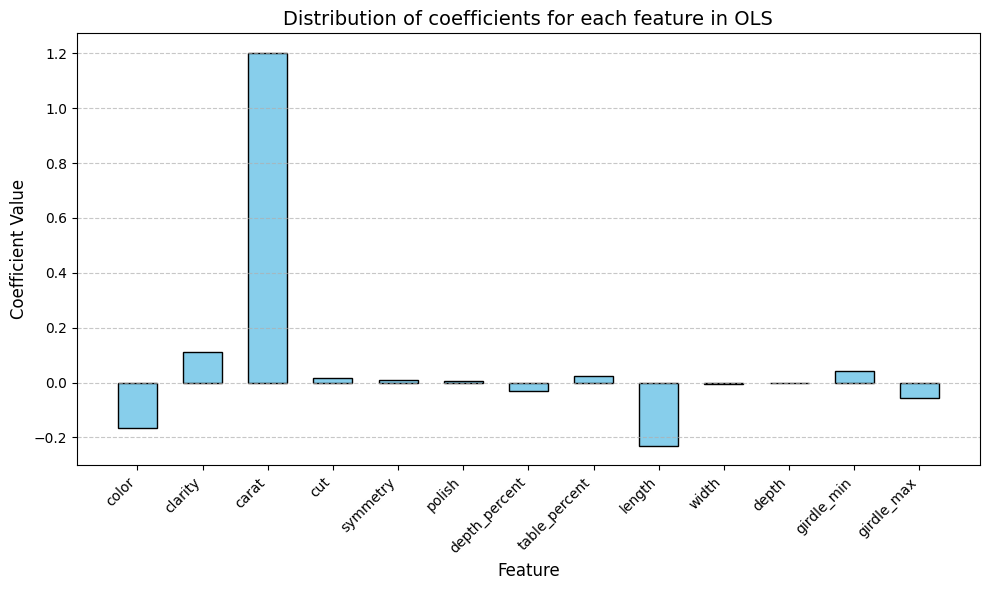

In [ ]:
# Fit the model
lr_fit = LinearRegression().fit(diamond_standard_x, diamond_standard_y)
OLS_coef = lr_fit.coef_.reshape(-1,)

# Plot
plt.figure(figsize=(10, 6))  # Increased figure size
plt.bar(np.arange(len(OLS_coef)), OLS_coef, color='skyblue', edgecolor='black', width=0.6)  # Adjusted bar width and color
plt.xticks(np.arange(len(OLS_coef)), diamond_standard_x.columns, rotation=45, ha='right')  # Rotated x-ticks
plt.ylabel("Coefficient Value", fontsize=12)  # Increased font size
plt.xlabel("Feature", fontsize=12)  # Increased font size
plt.title("Distribution of coefficients for each feature in OLS", fontsize=14)  # Increased font size
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Added grid
plt.tight_layout()  # Adjust layout to fit the figure neatly
plt.show()

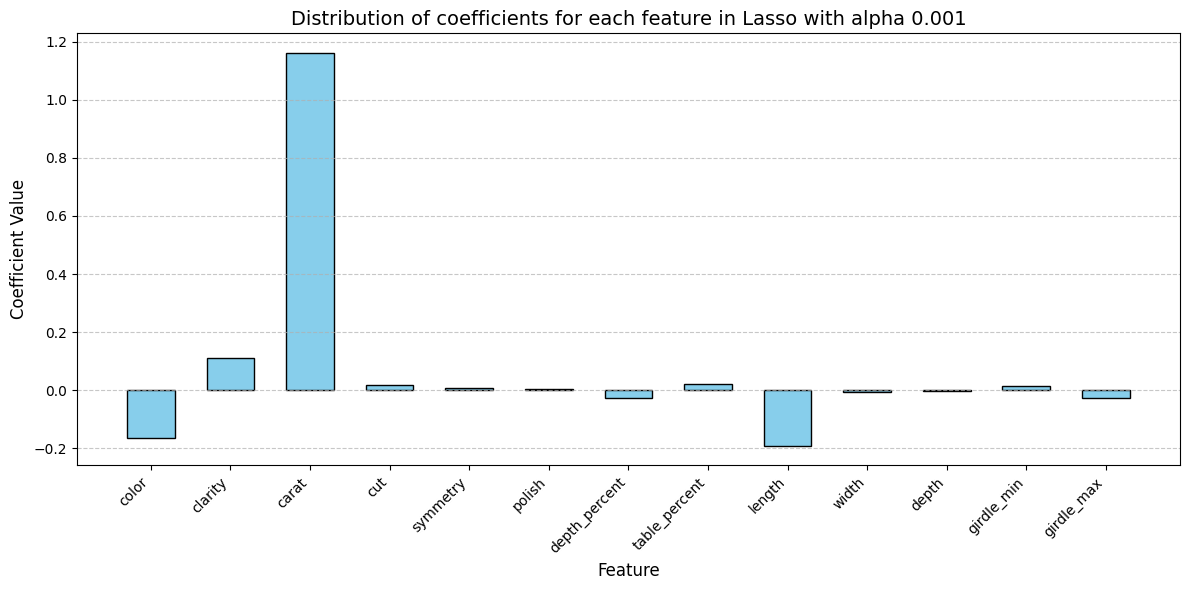

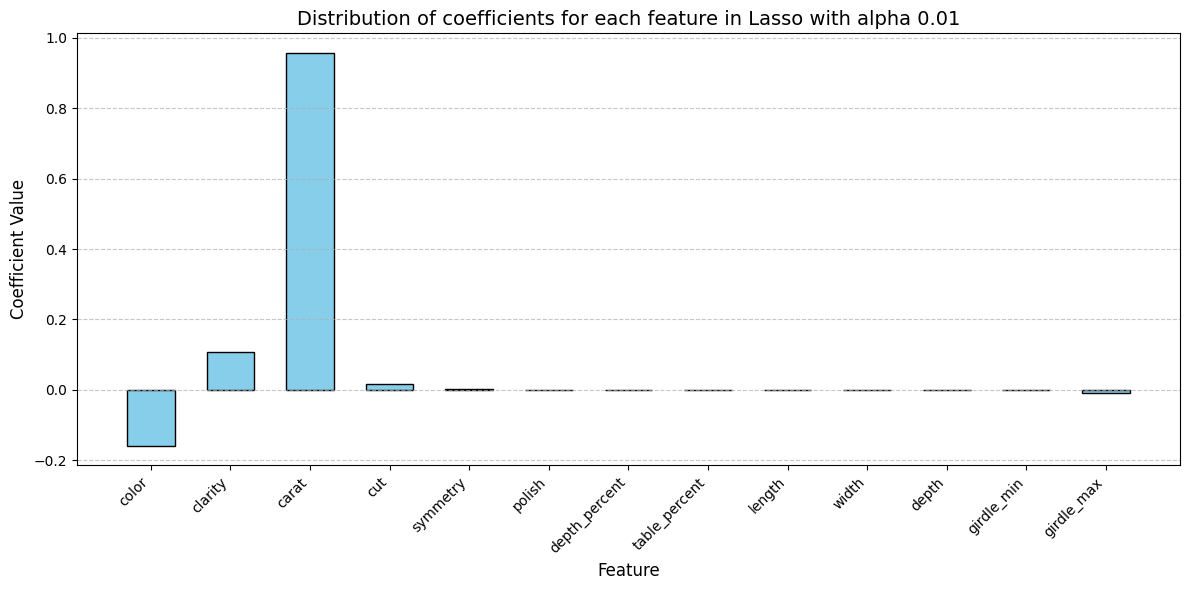

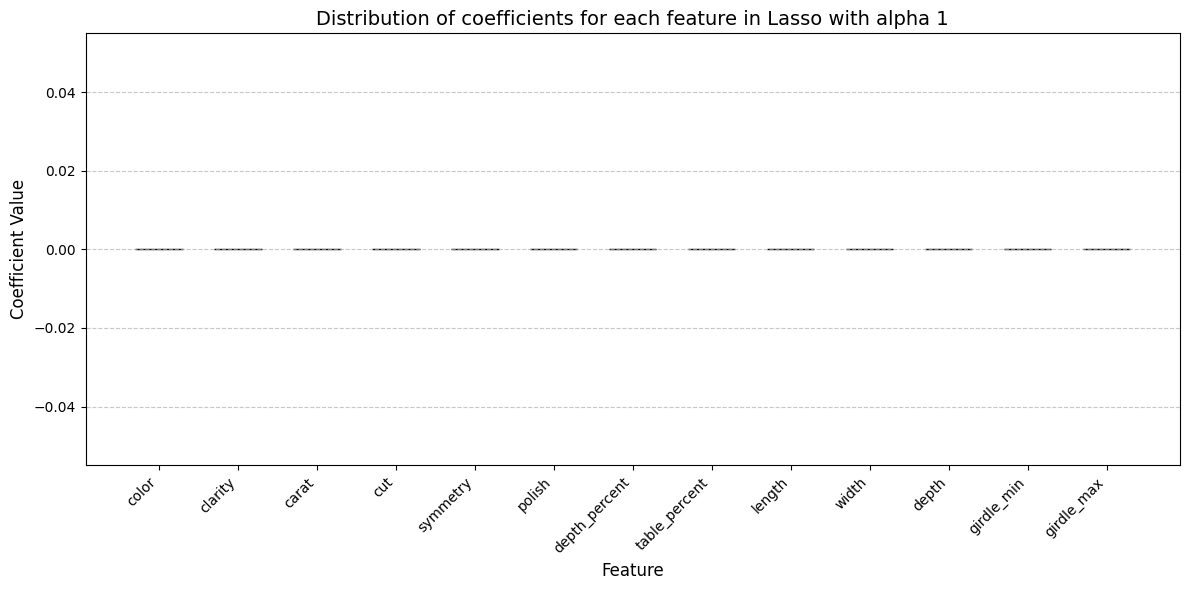

In [ ]:
# Iterate through the list of alphas and plot the Lasso coefficients
for alpha in [1e-3, 1e-2, 1]:
    lr_fit = Lasso(alpha=alpha).fit(diamond_standard_x, diamond_standard_y)
    Lasso_coef = lr_fit.coef_.reshape(-1,)

    # Create a larger figure for clarity
    plt.figure(figsize=(12, 6))
    plt.bar(np.arange(len(Lasso_coef)), Lasso_coef, color='skyblue', edgecolor='black', width=0.6)

    # Rotate x-tick labels for better readability
    plt.xticks(np.arange(len(Lasso_coef)), diamond_standard_x.columns, rotation=45, ha='right')

    # Improve label and title font sizes
    plt.ylabel("Coefficient Value", fontsize=12)
    plt.xlabel("Feature", fontsize=12)
    plt.title(f"Distribution of coefficients for each feature in Lasso with alpha {alpha}", fontsize=14)

    # Add a horizontal grid to make reading the plot easier
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Adjust the layout
    plt.tight_layout()
    plt.show()

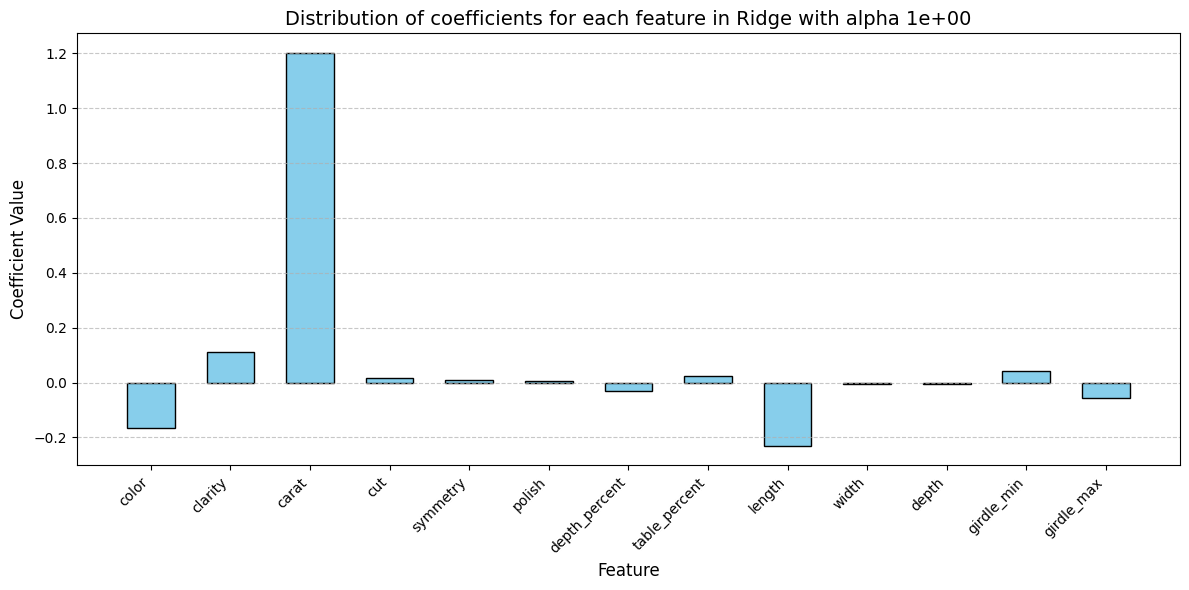

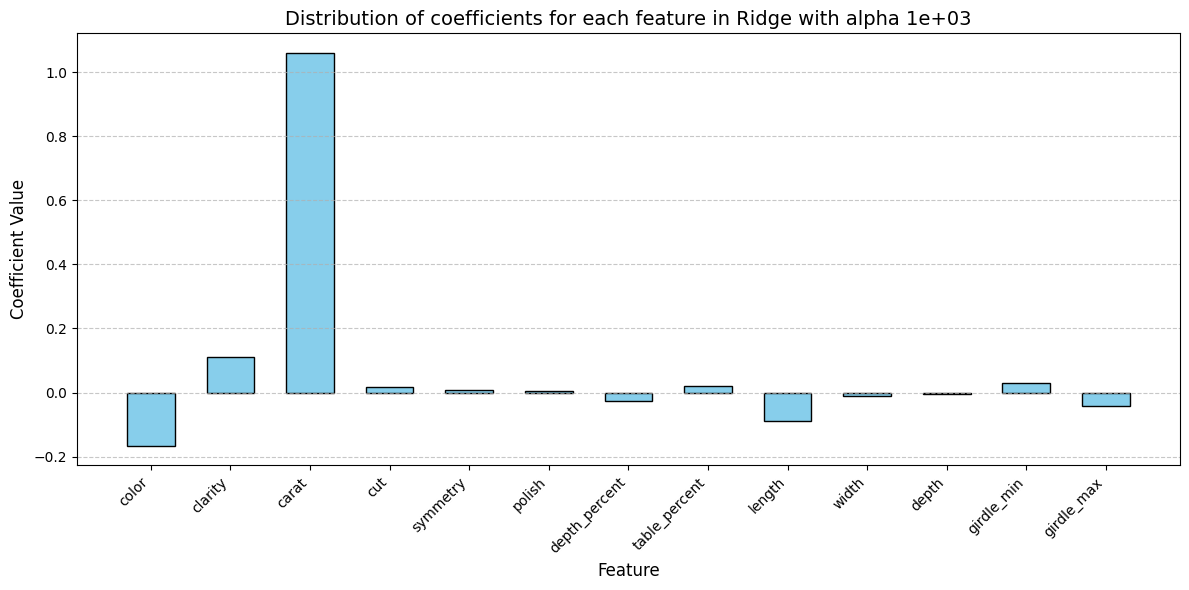

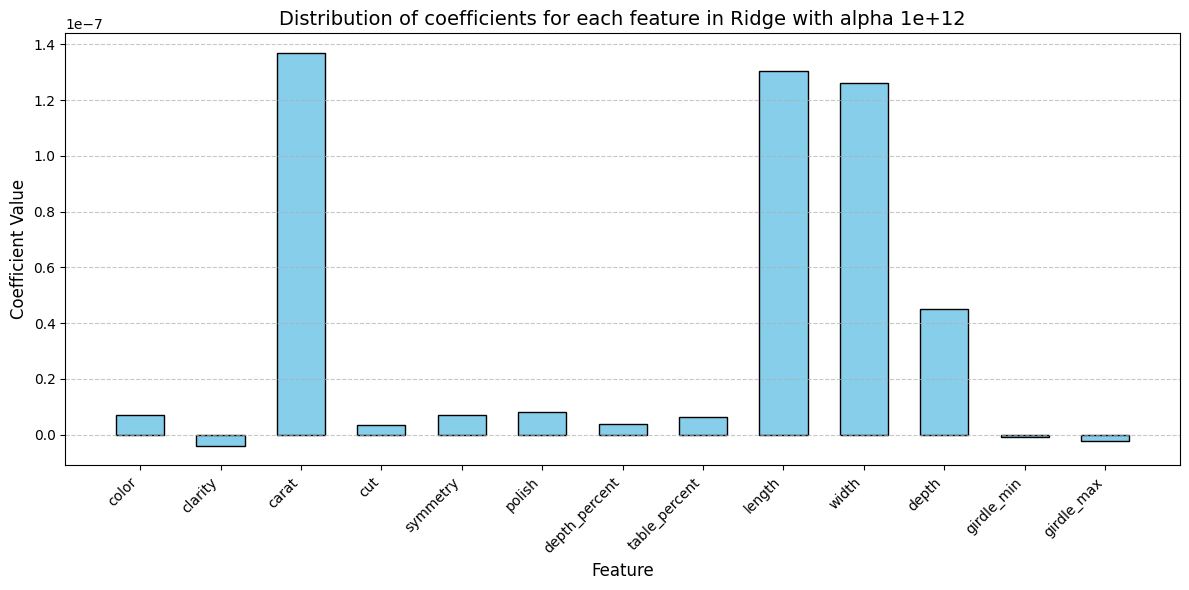

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge

# Assuming df_train_features_ss is your standardized features DataFrame
# and df_train_labels_ss is your labels DataFrame

# Iterate through the list of alphas and plot the Ridge coefficients
for alpha in [1, 1e3, 1e12]:
    lr_fit = Ridge(alpha=alpha).fit(diamond_standard_x, diamond_standard_y)
    Ridge_coef = lr_fit.coef_.reshape(-1,)

    # Create a larger figure for clarity
    plt.figure(figsize=(12, 6))
    plt.bar(np.arange(len(Ridge_coef)), Ridge_coef, color='skyblue', edgecolor='black', width=0.6)

    # Rotate x-tick labels for better readability
    plt.xticks(np.arange(len(Ridge_coef)), diamond_standard_x.columns, rotation=45, ha='right')

    # Improve label and title font sizes
    plt.ylabel("Coefficient Value", fontsize=12)
    plt.xlabel("Feature", fontsize=12)
    plt.title(f"Distribution of coefficients for each feature in Ridge with alpha {alpha:.0e}", fontsize=14)

    # Add a horizontal grid to make reading the plot easier
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Adjust the layout
    plt.tight_layout()
    plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

default_pipeline = Pipeline([
    ('model',LinearRegression())
    ])

params = [
     {
          "model":[LinearRegression()]
     },
     {
          "model":[Ridge()],
          "model__alpha":[1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4,1e5,1e6]
     },
     {
          "model":[Lasso()],
          "model__alpha":[1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4,1e5,1e6]
     }
]

#KFold(n_splits=5, shuffle=False, random_state=42)
g_s = GridSearchCV(default_pipeline, params,cv=KFold(n_splits=10,shuffle = True, random_state = 42),n_jobs=-1, scoring=('neg_root_mean_squared_error'),verbose=10,
                    return_train_score=False)
g_s.fit(diamond_standard_x,diamond_standard_y)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('model', LinearRegression())]),
             n_jobs=-1,
             param_grid=[{'model': [LinearRegression()]},
                         {'model': [Ridge()],
                          'model__alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01,
                                           0.1, 1, 10.0, 100.0, 1000.0, 10000.0,
                                           100000.0, 1000000.0]},
                         {'model': [Lasso(alpha=1e-05)],
                          'model__alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01,
                                           0.1, 1, 10.0, 100.0, 1000.0, 10000.0,
                                           100000.0, 1000000.0]}],
             scoring='neg_root_mean_squared_error', verbose=10)

In [ ]:
df_g_s = pd.DataFrame(g_s.cv_results_)
sorted_g_s = df_g_s.sort_values(by='rank_test_score', ascending=True)
sorted_g_s[:20]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
15,1.763288,0.227899,0.006018,0.003425,Lasso(alpha=1e-05),0.00001,"{'model': Lasso(alpha=1e-05), 'model__alpha': ...",-0.348347,-0.339750,-0.336025,-0.342638,-0.349220,-0.364298,-0.338127,-0.339162,-0.343674,-0.346992,-0.344823,0.007758,1
14,2.050876,0.312343,0.005310,0.001996,Lasso(alpha=1e-05),0.000001,"{'model': Lasso(alpha=1e-05), 'model__alpha': ...",-0.348347,-0.339752,-0.336026,-0.342637,-0.349215,-0.364304,-0.338129,-0.339159,-0.343674,-0.346990,-0.344823,0.007759,2
0,0.159321,0.015987,0.004408,0.001114,LinearRegression(),NaN,{'model': LinearRegression()},-0.348347,-0.339752,-0.336026,-0.342636,-0.349215,-0.364304,-0.338129,-0.339159,-0.343674,-0.346990,-0.344823,0.007759,3
1,0.049591,0.009680,0.004760,0.001526,Ridge(),0.000001,"{'model': Ridge(), 'model__alpha': 1e-06}",-0.348347,-0.339752,-0.336026,-0.342636,-0.349215,-0.364304,-0.338129,-0.339159,-0.343674,-0.346990,-0.344823,0.007759,4
2,0.048980,0.010182,0.004148,0.001098,Ridge(),0.00001,"{'model': Ridge(), 'model__alpha': 1e-05}",-0.348347,-0.339752,-0.336026,-0.342636,-0.349215,-0.364304,-0.338129,-0.339159,-0.343674,-0.346990,-0.344823,0.007759,5
3,0.058464,0.013430,0.004855,0.002562,Ridge(),0.0001,"{'model': Ridge(), 'model__alpha': 0.0001}",-0.348347,-0.339752,-0.336026,-0.342636,-0.349215,-0.364304,-0.338129,-0.339159,-0.343674,-0.346990,-0.344823,0.007759,6
4,0.068810,0.020484,0.006576,0.004190,Ridge(),0.001,"{'model': Ridge(), 'model__alpha': 0.001}",-0.348347,-0.339752,-0.336026,-0.342636,-0.349215,-0.364304,-0.338129,-0.339159,-0.343674,-0.346990,-0.344823,0.007759,7
5,0.074876,0.018510,0.005487,0.003872,Ridge(),0.01,"{'model': Ridge(), 'model__alpha': 0.01}",-0.348347,-0.339752,-0.336026,-0.342636,-0.349215,-0.364304,-0.338129,-0.339159,-0.343674,-0.346990,-0.344823,0.007759,8
6,0.078811,0.013947,0.007335,0.003751,Ridge(),0.1,"{'model': Ridge(), 'model__alpha': 0.1}",-0.348347,-0.339752,-0.336026,-0.342636,-0.349215,-0.364304,-0.338129,-0.339159,-0.343674,-0.346990,-0.344823,0.007759,9
7,0.083696,0.020379,0.006315,0.003649,Ridge(),1,"{'model': Ridge(), 'model__alpha': 1}",-0.348347,-0.339751,-0.336025,-0.342637,-0.349218,-0.364301,-0.338128,-0.339160,-0.343673,-0.346991,-0.344823,0.007758,10


In [ ]:
best_lasso_result = df_g_s.iloc[15]
best_ridge_result = df_g_s.iloc[1]
OLS_result = df_g_s.iloc[0]

print("Best Model: ", g_s.best_estimator_)
print("Best Lasso alpha: ", best_lasso_result["param_model__alpha"])
print("Best RMSE(LASSO): ",-best_lasso_result["mean_test_score"])
print("Rank: ",best_lasso_result["rank_test_score"])
print("\n")
print("Best Ridge alpha: ", best_ridge_result["param_model__alpha"])
print("Best RMSE(RIDGE): ",-best_ridge_result["mean_test_score"])
print("Rank: ",best_ridge_result["rank_test_score"])
print("\n")
print("OLS Score: ",-OLS_result["mean_test_score"])
print("Rank: ",OLS_result["rank_test_score"])

Best Model:  Pipeline(steps=[('model', Lasso(alpha=1e-05))])
Best Lasso alpha:  1e-05
Best RMSE(LASSO):  0.3448231637488446
Rank:  1


Best Ridge alpha:  1e-06
Best RMSE(RIDGE):  0.3448231770743167
Rank:  4


OLS Score:  0.34482317707430865
Rank:  3


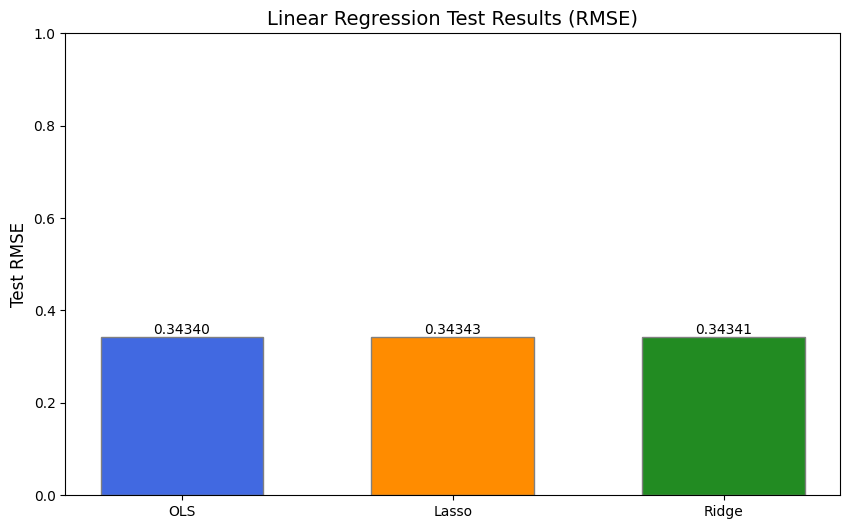

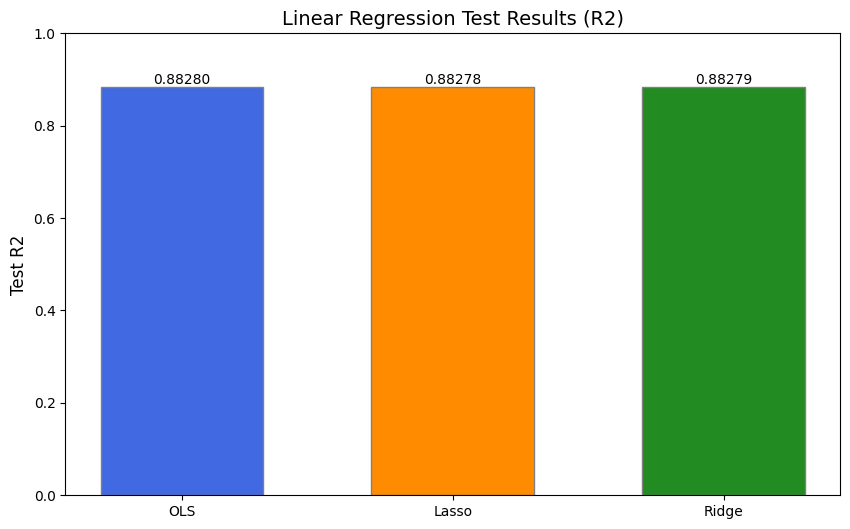

[0.3433995726576627, 0.34342589553076913, 0.34341379439744146]
[0.8828015626784848, 0.8827835945848821, 0.882791855035698]


In [ ]:
# TODO: Uncomment and remove (0.341822, 0.341826) and (0.882022, 0.882025) hardcoded parts

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Test Results
rms_list = []
r2_list = []

# Define models and their parameters
models = [
    (LinearRegression(), {}),
    (Lasso(), {'alpha': 0.0001}),
    (Ridge(), {'alpha': 10})
]

# Loop through the models, fit them, make predictions, and store results
for model, params in models:
    clf = model.set_params(**params)
    lr_fit = clf.fit(df_train_features_ss, np.array(df_train_labels_ss).ravel())
    preds = lr_fit.predict(df_test_features_ss)

    rms = mean_squared_error(df_test_labels_ss, preds, squared=False)
    rms_list.append(rms)

    r2 = r2_score(df_test_labels_ss, preds)
    r2_list.append(r2)

# Function to plot bar charts for RMSE and R^2
def plot_performance_scores(scores, metric_name, ylims, fmt):
    plt.figure(figsize=(10, 6))
    bars = plt.bar(np.arange(1, 4), scores, color=colors, edgecolor='grey', width=0.6)
    plt.title(f"Linear Regression Test Results ({metric_name})", fontsize=14)
    plt.ylabel(f"Test {metric_name}", fontsize=12)
    plt.xticks([1, 2, 3], ["OLS", "Lasso", "Ridge"])
    plt.ylim(*ylims)

    # Adjust text labels
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, fmt.format(yval), ha='center', va='bottom', fontsize=10)

    plt.show()

score_range = (0, 1)

# Set the colors for each model
colors = ['royalblue', 'darkorange', 'forestgreen']
plot_performance_scores(rms_list, 'RMSE', score_range, '{:.5f}')

# Plot for R2
plot_performance_scores(r2_list, 'R2', score_range, '{:.5f}')
print(rms_list)
print(r2_list)

# NOTE: If you get an error from running this block (which you shouldn't),
#       it is because the generated scores go beyond (0, 1).
#       To fix this, modify the values in the score_range variable

QUESTION 4.3 Does feature standardization play a role in improving the model performance (in the cases with ridge regularization)? Justify your answer.

QUESTION 4.4 Some linear regression packages return p-values for different features2 . What is the meaning of these p-values and how can you infer the most significant features? A qualitative reasoning is sufficient.

Question 5.1 - What are the most salient features?

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import PolynomialFeatures
from joblib import Memory

diamond_standard_x_top6 = SelectKBest(score_func = f_regression, k = 6).fit_transform(diamond_standard_x, diamond_standard_y)

location = "cachedir"
memory = Memory(location=location, verbose=10)

poly_pipe_diamond_ = Pipeline([
    ('poly_transform', PolynomialFeatures()),
    ('model', Ridge(alpha=0.001))
],memory=memory)

poly_pipe_gt_ = Pipeline([
    ('poly_transform', PolynomialFeatures()),
    ('model', Lasso(alpha=0.001))
],memory=memory)

poly_param_= {
    'poly_transform__degree': np.arange(1,6,1)
}

poly_grid_diamond  = GridSearchCV(poly_pipe_diamond_ , param_grid=poly_param_, cv=10, n_jobs=-1, verbose=3, scoring='neg_root_mean_squared_error', return_train_score=True, error_score='raise').fit(diamond_standard_x_top6, diamond_standard_y)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(PolynomialFeatures(), array([[-0.916097, ..., -0.73043 ],
       ...,
       [-1.340492, ...,  0.734664]]), 
0        -0.659094
1        -0.659094
2        -0.659094
3        -0.659094
4        -0.659094
            ...   
149866    6.090005
149867    6.091067
149868    6.091067
149869    6.091704
149870    6.092553
Name: price, Length: 149871, dtype: float64, 
None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.1s, 0.0min


In [ ]:
def gs_output(model, title):
    print(f"Best parameters for {title}: ", model.best_params_)
    print(f"Best score for {title}: ", model.best_score_)

gs_output(poly_grid_diamond, "PolynomialFeatures of Diamonds" )

Best parameters for PolynomialFeatures of Diamonds:  {'poly_transform__degree': 2}
Best score for PolynomialFeatures of Diamonds:  -0.31559236079123537


In [ ]:
print(poly_grid_diamond.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_poly_transform__degree', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'split5_train_score', 'split6_train_score', 'split7_train_score', 'split8_train_score', 'split9_train_score', 'mean_train_score', 'std_train_score'])


In [ ]:
!pip show scikit-learn
!pip install --upgrade scikit-learn

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

s_d = SelectKBest(score_func = f_regression, k = 6)
s_d.fit_transform(diamond_standard_x, diamond_standard_y)
column_s = diamond_standard_x.columns[s_d.get_support()].tolist()

d_params = poly_grid_diamond.best_estimator_.get_params()
d_coefs = d_params['model'].coef_

# Get the feature names from PolynomialFeatures
d_names = d_params['poly_transform'].get_feature_names_out(column_s)

# Sort the coefficients by their absolute values in descending order
d_sorted_indices = np.argsort(-abs(d_coefs))

# Initialize a set to keep track of unique feature names
unique_features = set()

# Initialize a list to store the top salient features
salient_features = []

# Iterate over the sorted indices
for i in d_sorted_indices:
    # Split each polynomial feature by spaces to get individual base features
    features = d_names[i].split()
    # Add the base features to the set if they aren't already present and are not powers or interactions
    for feature in features:
        if '^' not in feature and '*' not in feature and feature not in unique_features:
            unique_features.add(feature)
            salient_features.append(feature)
    # Stop if we have collected 6 unique features
    if len(salient_features) >= 6:
        break

print('Top 6 Salient features (Diamond) in order:', salient_features)

Top 6 Salient features (Diamond) in order: ['carat', 'width', 'length', 'color', 'polish', 'depth']


QUESTION 5.2 What degree of polynomial is best? How did you find the optimal degree? What does a very high-order polynomial imply about the fit on the training data? What about its performance on testing data?

QUESTION 6.1 Adjust your network size (number of hidden neurons and depth), and weight decay as regularization. Find a good hyper-parameter set systematically (no more than 20 experiments in total).

In [ ]:
# !pip install --upgrade scikit-learn
!pip install scipy

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Assuming diamond_standard_x_top6 and diamond_standard_y are defined
# Also assuming 'memory' is defined if you're using joblib.Memory for caching

mlpr = Pipeline([
    ('model', MLPRegressor(max_iter=1000, early_stopping=True)),
], memory=memory)

param_list = {
    "model__hidden_layer_sizes": [(30, 40), (40, 60)],
    "model__activation": ["relu"],
    "model__solver": ["adam"],
    "model__alpha": [0.0001, 0.001, 0.01],
}

grid_diamond_mlp = GridSearchCV(mlpr, param_grid=param_list, cv=3, n_jobs=-1, verbose=1,
                     scoring='neg_root_mean_squared_error', return_train_score=True)
grid_diamond_mlp.fit(diamond_standard_x_top6, diamond_standard_y)

# Check the results
print("Best parameters set found on development set:")
print(grid_diamond_mlp.best_params_)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters set found on development set:
{'model__activation': 'relu', 'model__alpha': 0.01, 'model__hidden_layer_sizes': (40, 60), 'model__solver': 'adam'}


In [ ]:
gs_output(grid_diamond_mlp, "Neural Network of Diamonds" )
rmse = np.sqrt(-grid_diamond_mlp.best_score_)
print(f"original rmse = {rmse}")

Best parameters for Neural Network of Diamonds:  {'model__activation': 'relu', 'model__alpha': 0.01, 'model__hidden_layer_sizes': (40, 60), 'model__solver': 'adam'}
Best score for Neural Network of Diamonds:  -0.6205043512139231
original rmse = 0.7877209856376324


QUESTION 7.3 Randomly pick a tree in your random forest model (with maximum depth of 4) and plot its structure. Which feature is selected for branching at the root node? What can you infer about the importance of this feature as opposed to others? Do the important features correspond to what you got in part 3.3.1?

In [ ]:
# Select the top 13 features based on f_regression
s_d = SelectKBest(score_func=f_regression, k=13)
diamond_standard_x_top13 = s_d.fit_transform(diamond_standard_x, diamond_standard_y)
column_s = diamond_standard_x.columns[s_d.get_support()].tolist()

print(column_s)

['color', 'clarity', 'carat', 'cut', 'symmetry', 'polish', 'depth_percent', 'table_percent', 'length', 'width', 'depth', 'girdle_min', 'girdle_max']


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

# Train RandomForestRegressor on the dataset with the top 13 selected features
rf_best_diamond = RandomForestRegressor(max_depth=4, max_features=4, n_estimators=10)
rf_best_diamond.fit(diamond_standard_x[column_s], diamond_standard_y)  # Use column_s to select the top 13 features

export_graphviz(
    rf_best_diamond.estimators_[1],
    out_file='rf_best_diamond.dot',
    feature_names=column_s,
    rounded=True,
    precision=1,
    filled=True
)

# Convert to PNG using pydot without specifying size
(graph,) = pydot.graph_from_dot_file('rf_best_diamond.dot')
graph.write_png('rf_best_diamond.png')


QUESTION 7.4 Measure “Out-of-Bag Error” (OOB).

In [ ]:
rf_diamond_ = RandomForestRegressor(n_estimators=100,  # Increased number of trees
                                    max_features=4,
                                    max_depth=4,
                                    oob_score=True)
rf_diamond_.fit(diamond_standard_x_top6, diamond_standard_y)

print('Best Random Forest Model for Diamond Dataset:')
print('OOB score: %.4f' % rf_diamond_.oob_score_)
print('R^2 score: %.4f' % rf_diamond_.score(diamond_standard_x_top6, diamond_standard_y))


Best Random Forest Model for Diamond Dataset:
OOB score: 0.9025
R^2 score: 0.9036


## Question 8

QUESTION 8.2 Apply Bayesian optimization using skopt.BayesSearchCV from scikit-optmize to find the ideal hyperparameter combination in your search space. Keep your search space small enough to finish running on a single Google Colab instance within 60 minutes. Report the best hyperparameter set found and the corresponding RMSE.

In [ ]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 2.1 MB/s eta 0:00:00


In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.pipeline import Pipeline
import lightgbm as lgb
from sklearn.metrics import make_scorer, mean_squared_error

# Define a pipeline that contains the LightGBM model
lgb_pip = Pipeline([
    ('model', lgb.LGBMRegressor(random_state=42))
], memory=memory)

# Define the search space for the hyperparameters
param_lgb = {
    'model__num_leaves': Integer(20, 100),
    'model__learning_rate': Real(0.01, 0.1, prior='log-uniform'),
    'model__max_depth': Integer(3, 7),
    'model__min_child_samples': Integer(10, 30),
    'model__subsample': Real(0.6, 0.8),
    'model__colsample_bytree': Real(0.6, 0.8),
    'model__reg_alpha': Real(0.0, 0.5),
    'model__reg_lambda': Real(0.0, 0.5)
}

rmse_scorer = make_scorer(mean_squared_error, squared=False, greater_is_better=False)

# Setup BayesSearchCV to perform the Bayesian optimization
lg_diamond = BayesSearchCV(
    lgb_pip,
    search_spaces=param_lgb,
    cv=5,
    n_iter=20
    n_jobs=-1,
    verbose=1,
    scoring=rmse_scorer,
    return_train_score=True,
    random_state=42
)

# Fit the BayesSearchCV to find the best hyperparameters
lg_diamond.fit(diamond_standard_x_top6, diamond_standard_y)

# Report the best hyperparameter set found and the corresponding RMSE
print('Best hyperparameter set found:')
print(lg_diamond.best_params_)
best_rmse = mean_squared_error(diamond_standard_y, lg_diamond.predict(diamond_standard_x_top6), squared=False)
print(f'Corresponding RMSE: {best_rmse:.4f}')

def gs_output(searchcv, title):
    print(f'Best score for {title}: {searchcv.best_score_}')
    print(f'Best parameters for {title}: {searchcv.best_params_}')

gs_output(lg_diamond, "LightGBM of Diamonds")


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [ ]:
print(f'Best score for LightGBM of Diamonds: {lg_diamond.best_score_}')

Best score for LightGBM of Diamonds: -0.32106710899626095
